# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
<br>
<br>
**Цель исследования:**
- Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра
- Изучить время продажи квартиры. Построить гистограмму. Посчитать среднее и медиану. Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- Убать редкие и выбивающиеся значения. Описать, какие особенности обнаружены
- Какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Изучить зависимость от даты размещения: дня недели, месяца и года
- Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name
- Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в Санкт-Петербурге (locality_name). Задача — выяснить, какая область входит в центр. Создать столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитать среднюю цену для каждого километра. Построить график: он должен показывать, как цена зависит от удалённости от центра. Определить границу, где график сильно меняется, — это и будет центральная зона
- Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы. Отличаются ли они от общих выводов по всей базе?

Нужно научиться определять рыночную стоимость объектов недвижимости.
<br>
Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
<br>
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Данные о поведении пользователей вы получите из файла `/datasets/real_estate_data.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Вы проверите данные на ошибки и оцените их влияние на исследование. Затем, на этапе предобработки вы поищете возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в семь этапов:
 1. Обзор данных
 2. Предобработка данных
 3. Подсчитать и добавить в таблицу
 4. Провести исследовательский анализ данных
 5. Выделить 10 населенных пунктов с наибольшим числом объявлений
 6. Выделение центра Санкт-Петербурга
 7. Общий вывод

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Определение-и-изучение-пропущенных-значений" data-toc-modified-id="Определение-и-изучение-пропущенных-значений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Определение и изучение пропущенных значений</a></span><ul class="toc-item"><li><span><a href="#Столбец-&quot;высота-потолков&quot;" data-toc-modified-id="Столбец-&quot;высота-потолков&quot;-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Столбец "высота потолков"</a></span></li><li><span><a href="#Столбец-&quot;всего-этажей-в-доме&quot;" data-toc-modified-id="Столбец-&quot;всего-этажей-в-доме&quot;-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Столбец "всего этажей в доме"</a></span></li><li><span><a href="#Столбец-&quot;жилая-площадь-в-квадратных-метрах&quot;" data-toc-modified-id="Столбец-&quot;жилая-площадь-в-квадратных-метрах&quot;-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Столбец "жилая площадь в квадратных метрах"</a></span></li><li><span><a href="#Столбец-&quot;апартаменты&quot;" data-toc-modified-id="Столбец-&quot;апартаменты&quot;-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Столбец "апартаменты"</a></span></li><li><span><a href="#Столбец-&quot;площадь-кухни-в-квадратных-метрах&quot;" data-toc-modified-id="Столбец-&quot;площадь-кухни-в-квадратных-метрах&quot;-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Столбец "площадь кухни в квадратных метрах"</a></span></li><li><span><a href="#Столбец-&quot;число-балконов&quot;" data-toc-modified-id="Столбец-&quot;число-балконов&quot;-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Столбец "число балконов"</a></span></li><li><span><a href="#Столбец-&quot;название-населённого-пункта&quot;" data-toc-modified-id="Столбец-&quot;название-населённого-пункта&quot;-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Столбец "название населённого пункта"</a></span></li><li><span><a href="#Столбец-&quot;расстояние-до-ближайшего-аэропорта-в-метрах&quot;" data-toc-modified-id="Столбец-&quot;расстояние-до-ближайшего-аэропорта-в-метрах&quot;-2.1.8"><span class="toc-item-num">2.1.8&nbsp;&nbsp;</span>Столбец "расстояние до ближайшего аэропорта в метрах"</a></span></li><li><span><a href="#Столбец-&quot;расстояние-до-центра-города&quot;" data-toc-modified-id="Столбец-&quot;расстояние-до-центра-города&quot;-2.1.9"><span class="toc-item-num">2.1.9&nbsp;&nbsp;</span>Столбец "расстояние до центра города"</a></span></li><li><span><a href="#Cтолбец-&quot;число-парков-в-радиусе-3-км&quot;" data-toc-modified-id="Cтолбец-&quot;число-парков-в-радиусе-3-км&quot;-2.1.10"><span class="toc-item-num">2.1.10&nbsp;&nbsp;</span>Cтолбец "число парков в радиусе 3 км"</a></span></li><li><span><a href="#Столбец-&quot;расстояние-до-ближайшего-парка&quot;" data-toc-modified-id="Столбец-&quot;расстояние-до-ближайшего-парка&quot;-2.1.11"><span class="toc-item-num">2.1.11&nbsp;&nbsp;</span>Столбец "расстояние до ближайшего парка"</a></span></li><li><span><a href="#Столбец-&quot;число-водоёмов-в-радиусе-3-км&quot;" data-toc-modified-id="Столбец-&quot;число-водоёмов-в-радиусе-3-км&quot;-2.1.12"><span class="toc-item-num">2.1.12&nbsp;&nbsp;</span>Столбец "число водоёмов в радиусе 3 км"</a></span></li><li><span><a href="#Столбец-&quot;расстояние-до-ближайшего-водоёма&quot;" data-toc-modified-id="Столбец-&quot;расстояние-до-ближайшего-водоёма&quot;-2.1.13"><span class="toc-item-num">2.1.13&nbsp;&nbsp;</span>Столбец "расстояние до ближайшего водоёма"</a></span></li><li><span><a href="#Столбец-&quot;сколько-дней-было-размещено-объявление&quot;" data-toc-modified-id="Столбец-&quot;сколько-дней-было-размещено-объявление&quot;-2.1.14"><span class="toc-item-num">2.1.14&nbsp;&nbsp;</span>Столбец "сколько дней было размещено объявление"</a></span></li></ul></li><li><span><a href="#Приведение-данных-к-нужным-типам" data-toc-modified-id="Приведение-данных-к-нужным-типам-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Приведение данных к нужным типам</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Посчитать-и-добавить-в-таблицу" data-toc-modified-id="Посчитать-и-добавить-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посчитать и добавить в таблицу</a></span></li><li><span><a href="#Провести-исследовательский-анализ-данных" data-toc-modified-id="Провести-исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Провести исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров:-площади,-цены,-числа-комнат,-высоты-потолков,-срока-продажи-квартиры" data-toc-modified-id="Изучение-параметров:-площади,-цены,-числа-комнат,-высоты-потолков,-срока-продажи-квартиры-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров: площади, цены, числа комнат, высоты потолков, срока продажи квартиры</a></span><ul class="toc-item"><li><span><a href="#Площадь" data-toc-modified-id="Площадь-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Площадь</a></span></li><li><span><a href="#Цена" data-toc-modified-id="Цена-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Цена</a></span></li><li><span><a href="#Число-комнат" data-toc-modified-id="Число-комнат-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Число комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Время продажи квартиры</a></span></li><li><span><a href="#Уберем-редкие-и-выбивающиеся-значения" data-toc-modified-id="Уберем-редкие-и-выбивающиеся-значения-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>Уберем редкие и выбивающиеся значения</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1.7"><span class="toc-item-num">4.1.7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Зависимость-цены-от-площади-квартиры-и-от-расстояния-до-центра-города" data-toc-modified-id="Зависимость-цены-от-площади-квартиры-и-от-расстояния-до-центра-города-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Зависимость цены от площади квартиры и от расстояния до центра города</a></span></li><li><span><a href="#Зависимость-цены-от-числа-комнат,-этажа-и-времени-размещения-объявления:" data-toc-modified-id="Зависимость-цены-от-числа-комнат,-этажа-и-времени-размещения-объявления:-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Зависимость цены от числа комнат, этажа и времени размещения объявления:</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#10-населенных-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="10-населенных-пунктов-с-наибольшим-числом-объявлений-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>10 населенных пунктов с наибольшим числом объявлений</a></span></li><li><span><a href="#Выделение-центра-Санкт-Петербурга" data-toc-modified-id="Выделение-центра-Санкт-Петербурга-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выделение центра Санкт-Петербурга</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('real_estate_data.csv', sep='\t', decimal='.')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод**
<br>
В исходных данных содержатся 23699 строк, 14 из 22 столбцов имеют пропущенные значения. При этом сразу видны аномальные значения в виде высоты потолка в 1 и 100 м, жилая площадь в 2 м и цена в 12 190 руб.

## Предобработка данных

### Определение и изучение пропущенных значений

Напишем функцию, определяющую долю пропущенных значений в столбце. Эти сведения пригодятся для принятия решений о сохранении строк с пропусками в тех или иных столбцах:

In [4]:
def na_share(column):
      na_share = data[column].isna().sum() / len(data)
      return print(f'Пропущено {na_share:.1%} значений.')

#### Столбец "высота потолков"

In [5]:
na_share('ceiling_height')

Пропущено 38.8% значений.


In [6]:
data.loc[data['ceiling_height'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


Заменим пропущенные значения высоты потолков на медиану по этажности здания:

In [7]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('floors_total')['ceiling_height'].transform('mean'))
na_share('ceiling_height')

Пропущено 0.3% значений.


In [8]:
data[data['ceiling_height'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


Пропуски остались в тех случаях, где не было указано количество этажей в доме, заменим на общую медиану:

In [9]:
data.ceiling_height.where(data.ceiling_height.notna(), data.ceiling_height.median(), inplace=True)
na_share('ceiling_height')

Пропущено 0.0% значений.


Явной закономерности в причине появления пропусков не прослеживается, следует либо сделать заполнение этого пункта обязательным, либо автоматически заполнять высоту потолков на основании известных данных по квартирам в том же доме, либо брать информацию о высоте потолков из других источников.

#### Столбец "всего этажей в доме"

In [10]:
na_share('floors_total')

Пропущено 0.4% значений.


In [11]:
data[data['floors_total'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.711692,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.711692,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.711692,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.711692,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.711692,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


Строки с пропусками в количестве этажей совсем немного. Их следует удалить, т.к. дальше в исследовании нужно будет выявить зависимость цены квартиры от её этажа:

In [12]:
data.dropna(subset=['floors_total'], inplace=True)
na_share('floors_total')

Пропущено 0.0% значений.


Аналогично предыдущему пункту, следует либо сделать заполнение этого пункта обязательным, либо автоматически заполнять параметр на основании известных данных по квартирам в том же доме, либо брать информацию о количестве этажей из других источников.

#### Столбец "жилая площадь в квадратных метрах"

In [13]:
na_share('living_area')

Пропущено 7.9% значений.


In [14]:
data[data['living_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.731545,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.851567,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.599093,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.500000,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.731560,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


Замену пропусков произведём через цикл. Итератором будет индекс в series, где индексы - количество комнат, значения - медианная жилая площадь:

In [15]:
living_area_by_rooms = data.groupby('rooms')['living_area'].median()
for i in living_area_by_rooms.index: 
  data.loc[(data['living_area'].isna()) & (data['rooms'] == i), 'living_area'] = living_area_by_rooms[i]

na_share('living_area')

Пропущено 0.0% значений.


И снова, пропуски явно возникают из-за того что у пользователей сервиса есть возможность не указывать корректные значения.

#### Столбец "апартаменты"

In [16]:
na_share('is_apartment')

Пропущено 88.2% значений.


Посмотрим какие уникальные значения есть в столбце и сколько их:

In [17]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [18]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Явно стоит сделать для пользователей обязательным ответ на вопрос, является ли жилье аппартаментами.
<br>
Разумно предположить, что среди объектов недвижимости аппартаменты составляют меньшиство и пропуски следует заменить на False. Для этого применим метод "fillna()":

In [19]:
data['is_apartment'].fillna(value=False, inplace=True)
data['is_apartment'].value_counts()

False    23563
True        50
Name: is_apartment, dtype: int64

#### Столбец "площадь кухни в квадратных метрах"

In [20]:
na_share('kitchen_area')

Пропущено 9.4% значений.


Посмотрим как связана площадь кухни и отнесении квартиры к категории "студия":

In [21]:
data.query('studio == True')['kitchen_area'].unique()

array([nan])

Все квартиры студии имеют пропуск в столбце "площадь кухни в квадратных метрах", следует заменить эти значения на 0:

In [22]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0

Проверим гипотезу о том, что площадь кухни коррелирует с общей площадью квартиры, убрав из расчётов студии:

0.6094677166170354


<AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>

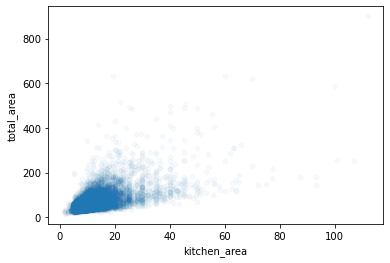

In [23]:
data_notstudio = data.query('kitchen_area > 0')
print(data_notstudio['kitchen_area'].corr(data_notstudio['total_area']))
data_notstudio.plot(x='kitchen_area', y='total_area', kind='scatter', alpha=0.03)

Наблюдаемую корреляцию Пирсона между площадью кухни и общей площадью квартиры в 0,61 можно считать умеренной.
<br>
Замену пропусков проведём с помощью цикла.
<br>
Итератором будет индекс в series, где индексы - количество комнат, значения - медианная общая площадь.
При каждой итерации переменной k присваивается коэффициент соотношения медианной площади кухни и медианной общей площади для квартир с количеством комнат i. Затем пропущенная площадь кухни для квартир с i комнатами заменяется на произведение медианной площади квартир с i комнатами и коэффициента k:

In [24]:
for i in data.groupby('rooms')['total_area'].median().index:
    k = data.query('rooms == @i')['kitchen_area'].median() / data.query('rooms == @i')['total_area'].median()
    data.loc[(data['kitchen_area'].isna())
             & (data['rooms'] == i), 'kitchen_area'] = data.query('rooms == @i')['total_area'].median() * k


#### Столбец "число балконов"

In [25]:
na_share('balcony')

Пропущено 48.6% значений.


Будем исходить из того, что пропуск обозначает отсутствие балкона:

In [26]:
data['balcony'].fillna(0, inplace=True)
na_share('balcony')

Пропущено 0.0% значений.


#### Столбец "название населённого пункта"

In [27]:
na_share('locality_name')

Пропущено 0.2% значений.


In [28]:
data[data['locality_name'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.550000,5.0,50.8,2,False,...,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.986831,4.0,42.6,2,False,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.851567,24.0,15.6,3,False,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.851567,24.0,33.1,21,False,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.793191,5.0,30.8,5,False,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


Знать название населённого пункта критически важно для анализа, строки без этих сведений удалим:

In [29]:
data.dropna(subset=['locality_name'], inplace=True)

Следует довести проблему до разработчиков, ситуация когда пользователь может опубликовать объявление о продаже недвижимости без указания населенного пункта явно не нормальна.

#### Столбец "расстояние до ближайшего аэропорта в метрах"

In [30]:
na_share('airports_nearest')

Пропущено 23.4% значений.


In [31]:
data[data['airports_nearest'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.640258,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.675556,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.793191,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.750000,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.599093,9.0,17.60,2,False,...,9.00,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


Видно, что для некоторых квартир не указано расстояние до всех объектов, которые могут повлиять на цену. Для решения этой проблемы стоит запрашивать либо точный адрес объект, либо указание его положения на карте.

#### Столбец "расстояние до центра города"

In [32]:
na_share('cityCenters_nearest')

Пропущено 23.3% значений.


Информация о расстоянии до центра понадобится при исследовании квартир в Санкт-Петербурге, посмотрим сколько таких значений пропущено:

In [33]:
spb_na_share = len(data.loc[(data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest'].isna())]) / len(data.loc[data['locality_name'] == 'Санкт-Петербург'])
print(f'Пропущено {spb_na_share:.2%} значений.')

Пропущено 0.38% значений.


#### Cтолбец "число парков в радиусе 3 км"

In [34]:
na_share('parks_around3000')

Пропущено 23.3% значений.


#### Столбец "расстояние до ближайшего парка"

In [35]:
na_share('parks_nearest')

Пропущено 65.9% значений.


#### Столбец "число водоёмов в радиусе 3 км"

In [36]:
na_share('ponds_around3000')

Пропущено 23.3% значений.


#### Столбец "расстояние до ближайшего водоёма"

In [37]:
na_share('ponds_nearest')

Пропущено 61.7% значений.


#### Столбец "сколько дней было размещено объявление"

In [38]:
na_share('days_exposition')

Пропущено 13.5% значений.


In [39]:
data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].median()

### Приведение данных к нужным типам

Приведем тип данных столбца "first_day_exposition" в формат времени:

In [40]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.4,2018-12-04,1,2.782385,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.793191,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.731545,14.0,45.0,9,False,...,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Формат столбца "first_day_exposition" был сконвертирован в datetime. В исходных данных количество часов, минут и секунд во всех строках равнялось 0, после конвертации мы видим только дату. Большего и не нужно.

### Вывод

**1. Пропущенные значения**
<br>
    **Высота потолков:** было пропущено 38,8% значений. Все пропущенные значения обработаны: была проведена замена на медиану. 
<br>
    **Число этажей в доме:** пропущено 0,4% значений. Этот параметр будет использоваться в дальнейшем анализе, при этом заменить пропущенные значения не представляется возможным, поэтому все строки с пропущенными значениями удалены. В дальнейшем таких пропусков можно избежать с помощью автоматического заполнение на основе точного адреса.
<br>
    **Жилая площадь:** пропущено 7,9% значений. Была произведена замена на медианную площадь для квартир с разным количеством комнат.
<br>
    **Апартаменты:** пропущено 88,2% значений. Пропуски были заменены на False. Следует сделать указание этого параметра обязательным для избежания пропусков.
<br>
    **Площадь кухни в квадратных метрах:** пропущено 9,4% значений. Для квартиры типа «студия» пропуск заменили на 0, далее выявили умеренную корреляцию между общей площадью квартиры и заменили пропуски на медиану в зависимости от количества комнат.
<br>
    **Число балконов:** пропущено 48,6% значений. Предположим, что пропуск свидетельствует о том, что число балконов равно нулю.
<br>
    **Название населенного пункта:** пропущено 0,2% значений. Все строки с пропущенными значениями удалены, так как этот признак будет использоваться в дальнейшем анализе. Необходимо сделать обязательным указание этого признака.
<br>
    **Расстояние до центра города:** пропущено 23,3% значений. При этом из всех квартир Санкт-Петербурга отсутствует информация по расстоянию до центра для 0,4% квартир.
<br>
    **Расстояние до ближайшего аэропорта, число парков в радиусе 3 км, расстояние до ближайшего парка, число водоемов в радиусе 3 км, расстояние до ближайшего водоема:** пропущенные значения в этих признаках оставим без изменений, так как они не будут использованы в исследовании.
<br>
    **Длительность размещения объявления:** пропущено 13,5% значений. Все пропущенные значения были заменены на медиану.


**2. Замена типа данных**
<br>
Тип признака Время публикации объявления был заменен со строчного на временной.

## Посчитать и добавить в таблицу


Цена квадратного метра:

In [42]:
data['price_of_sqm'] = round(data['last_price'] / data['total_area'], 1)

День недели, месяц и год публикации объявления:

In [43]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Этаж квартиры; варианты — первый, последний, другой:

In [44]:
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'другой'

Соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [45]:
data['living_area_ratio'] = round(data['living_area'] / data['total_area'], 4)
data['kitchen_area_ratio'] = round(data['kitchen_area'] / data['total_area'], 4)

In [46]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_of_sqm,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16.0,51.0,8,False,...,2.0,755.0,95.0,120370.4,3,3,2019,другой,0.4722,0.2315
1,7,3350000.0,40.4,2018-12-04,1,2.782385,11.0,18.6,1,False,...,0.0,NaN,81.0,82920.8,1,12,2018,первый,0.4604,0.2723
2,10,5196000.0,56.0,2015-08-20,2,2.793191,5.0,34.3,4,False,...,2.0,574.0,558.0,92785.7,3,8,2015,другой,0.6125,0.1482
3,0,64900000.0,159.0,2015-07-24,3,2.731545,14.0,45.0,9,False,...,3.0,234.0,424.0,408176.1,4,7,2015,другой,0.2830,0.0597
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.0,1,6,2018,другой,0.3200,0.4100


## Провести исследовательский анализ данных

Прежде чем приступить к исследованию данных стоит избавиться от явных аномалий в виде выбросов:

In [47]:
#функция примет на вход столбец таблицы и вернет границы "усов"
def whiskers(column):
  #объявим переменную с описательными статистиками
  column_described = data[column].describe()
  #объявим переменную с межквартильным размахом
  iqr = column_described[6] - column_described[4]
  #обозначим левый и правый ус и ограничим их минимальным и максимальным значением
  whisker_left = column_described[4] - 1.5 * iqr
  whisker_right = column_described[6] + 1.5 * iqr
  if whisker_left < column_described[3]:
    whisker_left = column_described[3]
  if whisker_right > column_described[7]:
    whisker_right = column_described[7]

  return [whisker_left, whisker_right]

### Изучение параметров: площади, цены, числа комнат, высоты потолков, срока продажи квартиры

#### Площадь

In [48]:
whiskers('total_area')

[12.0, 114.25]

In [49]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

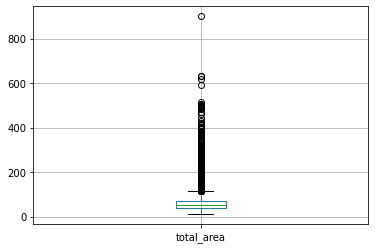

In [50]:
data.boxplot(column='total_area')

<AxesSubplot:>

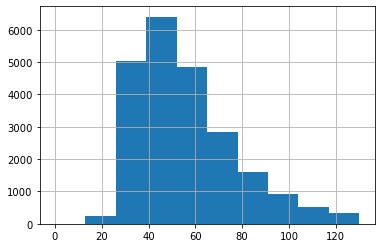

In [51]:
data['total_area'].hist(range=(0, 130))

<AxesSubplot:xlabel='total_area', ylabel='total_area'>

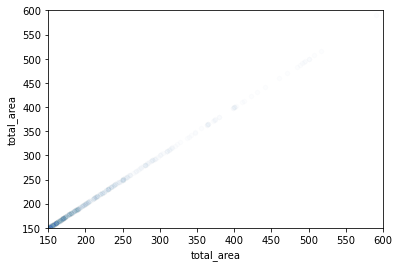

In [52]:
data.plot(kind = 'scatter', x = 'total_area', y = 'total_area', alpha=0.01, xlim=(150, 600), ylim=(150, 600))

Даже экстремально большие метражи квартир выглядят на визуализации относительно цельной линией без явных перерывов, в отличие от визуализации распределения высоты потолков, что будет видно ниже. Такие данные пока невозможно привести в порядок.

In [53]:
#функция возвращает процент аномальных значений
def anomaly_ratio(column):
  return(print(f'Аномальные значения составляют {len(data.loc[data[column] > whiskers(column)[1]]) / len(data):.2%} от всей выборки'))
  
anomaly_ratio('total_area')

Аномальные значения составляют 5.26% от всей выборки


In [54]:
data['too_large_total_area'] = data['total_area'] > whiskers('total_area')[1]

#### Цена

In [55]:
whiskers('last_price')

[12190.0, 11875000.0]

In [56]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Минимальная цена продажи квартиры 12190 руб! Осортируем цены по возрастанию и посмотрим как выглядит хвост:

In [57]:
data.sort_values(by='last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_of_sqm,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio,too_large_total_area
8793,7,12190.0,109.0,2019-03-20,2,2.750000,25.0,32.0,25,False,...,NaN,8.0,111.8,2,3,2019,последний,0.2936,0.3716,False
17456,7,430000.0,30.4,2019-04-22,1,3.006791,2.0,16.0,1,False,...,NaN,95.0,14144.7,0,4,2019,первый,0.5263,0.1974,False
14911,5,430000.0,54.0,2018-06-26,2,2.969474,3.0,30.5,3,False,...,NaN,44.0,7963.0,1,6,2018,последний,0.5648,0.1611,False
16274,18,440000.0,40.0,2018-07-10,1,2.793191,5.0,17.6,1,False,...,NaN,45.0,11000.0,1,7,2018,первый,0.4400,0.2250,False
9581,7,450000.0,43.4,2018-08-31,2,2.793191,5.0,30.3,3,False,...,NaN,96.0,10368.7,4,8,2018,другой,0.6982,0.1267,False


<AxesSubplot:>

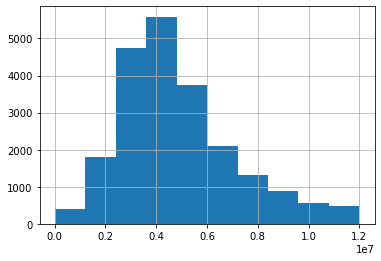

In [58]:
data['last_price'].hist(range=(10000, 12000000))

In [59]:
anomaly_ratio('last_price')

Аномальные значения составляют 8.68% от всей выборки


#### Число комнат

In [60]:
whiskers('rooms')

[0.0, 6.0]

In [61]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

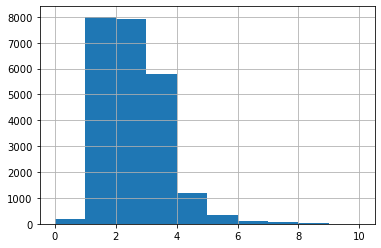

In [62]:
data['rooms'].hist(range=(0, 10))

In [63]:
anomaly_ratio('rooms')

Аномальные значения составляют 0.38% от всей выборки


#### Высота потолков

In [64]:
whiskers('ceiling_height')

[2.307944482813137, 3.0843396932908407]

In [65]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.771896
std          0.995303
min          1.000000
25%          2.599093
50%          2.710000
75%          2.793191
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:xlabel='ceiling_height', ylabel='ceiling_height'>

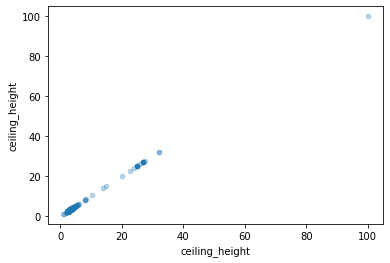

In [66]:
data.plot(kind = 'scatter', x = 'ceiling_height', y = 'ceiling_height', alpha=0.3)

Похоже, что есть пользователи, которые указывали высоту не в метрах, а в других единицах, возможно дециметрах. Посмотрим поближе:

<AxesSubplot:xlabel='ceiling_height', ylabel='ceiling_height'>

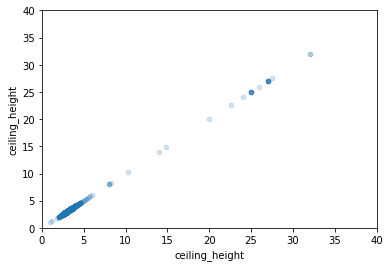

In [67]:
data.plot(kind = 'scatter', x = 'ceiling_height', y = 'ceiling_height', alpha=0.2, xlim=(0, 40), ylim=(0, 40))

Есть смысл поделить высоту потолков свыше 20 м на 10:

<AxesSubplot:xlabel='ceiling_height', ylabel='ceiling_height'>

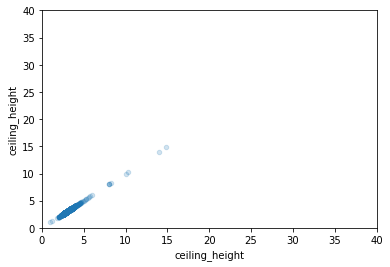

In [68]:
for value in data['ceiling_height']:
    if value >= 20:
        data.loc[data['ceiling_height'] == value] = value / 10

data.plot(kind = 'scatter', x = 'ceiling_height', y = 'ceiling_height', alpha=0.2, xlim=(0, 40), ylim=(0, 40))

<AxesSubplot:>

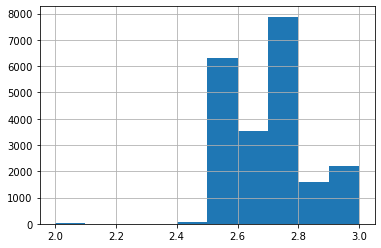

In [69]:
data['ceiling_height'].hist(range=(2, 3))

In [70]:
anomaly_ratio('ceiling_height')

Аномальные значения составляют 7.18% от всей выборки


In [71]:
#data['too_high_ceiling'] = (data['ceiling_height'] > whiskers('ceiling_height')[1]) | (data['ceiling_height'] < whiskers('ceiling_height')[0])
data['too_high_ceiling'] = data['ceiling_height'] > 7

#### Время продажи квартиры

In [72]:
whiskers('days_exposition')

[1.0, 427.5]

In [73]:
data['days_exposition'].describe()

count    23565.000000
mean       169.085784
std        206.515947
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

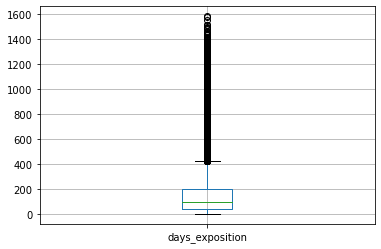

In [74]:
data.boxplot(column='days_exposition')

<AxesSubplot:>

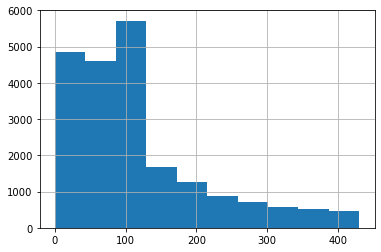

In [75]:
data['days_exposition'].hist(range=(0, 430))

In [76]:
anomaly_ratio('days_exposition')

Аномальные значения составляют 9.91% от всей выборки


#### Уберем редкие и выбивающиеся значения


In [77]:
'''good_data = data[(data['too_large_total_area'] == False) & 
     (data['too_big_last_price'] == False) &
     (data['too_many_rooms'] == False) &
     (data['too_high_ceiling'] == False) &
     (data['too_long_exposition'] == False) &
     (data['too_short_exposition'] == False)].reset_index(drop=True)'''

good_data = data[(data['last_price'] > 12190) &
    (data['too_large_total_area'] == False) &
    (data['too_high_ceiling'] == False)].reset_index(drop=True)

print('Доля чистых значений составила: {:.1%}'. format(len(good_data) / len(data)))

Доля чистых значений составила: 94.6%


#### Вывод
<br>
<br>
Средняя квартира, выставленная на продажу, имеет следующие характеристики: это 2-комнатная квартира площадью 52 кв. м с потолками 2,65 м, проданная за 3 месяца (95 дней) по цене 4,7 млн рублей.

В данных есть явные ошибки в виде метража от 114 до 900 м (5.26% от общего набора данных, сложно исправить), высота потолков от 8 до 32 м и даже 100 м (ошибочные данные частично вычищены, аномалий осталось 7.18%).

Выделяющиеся характеристики квартир из представленного набора данных:

- 7-комнатная квартира или больше
<br>
- площадью более 114,3 кв. м
<br>
- с потолками менее 2,25 м или более 3,05 м
<br>
- по цене более 11,9 млн рублей
<br>
- проданная за 14 месяцев (428 дней) или более
<br>

Как правило, продажа недвижимости занимала 3 месяца (95 дней). При этом четверть всех объектов недвижимости была продана в течение 45 дней с момента публикации. Если объект был продан в течение месяца, то необходимо проверить данную сделку на предмет мошенничества. Такая проверка особенна критична, если срок сделки не превышает двух недель. Кроме того, если объект был продан только после 14 месяцев (428 дней) с момента публикации, это говорит об аномально долгой продаже.

### Факторы, влияющие на стоимость квартиры



#### Зависимость цены от площади квартиры и от расстояния до центра города

In [78]:
round(good_data['last_price'].corr(good_data['total_area']), 2)

0.68

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

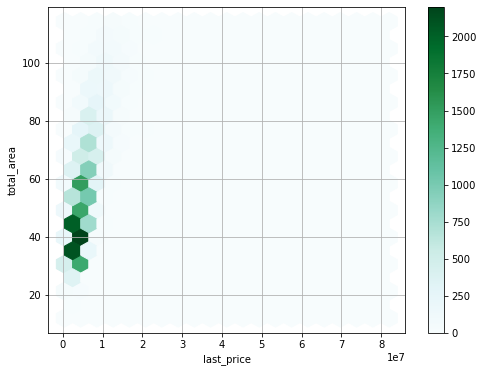

In [79]:
good_data.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
#good_data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.002) 


In [80]:
round(good_data['last_price'].corr(good_data['cityCenters_nearest']), 2)

-0.34

<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>

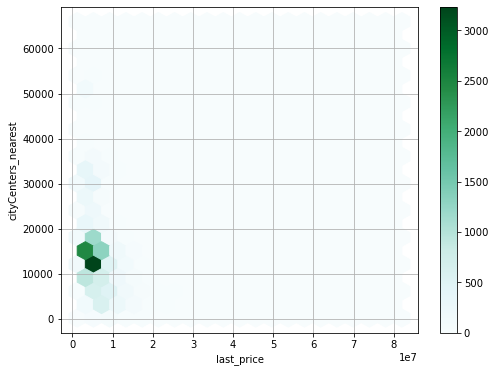

In [81]:
good_data.plot(x='last_price', y='cityCenters_nearest', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
#good_data.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.002)

#### Зависимость цены от числа комнат, этажа и времени размещения объявления:

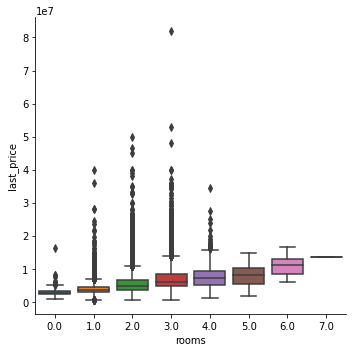

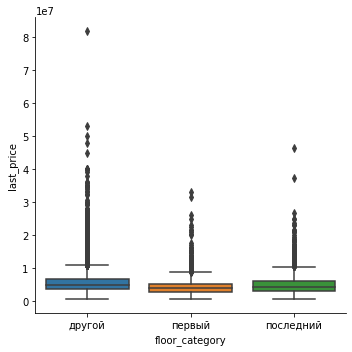

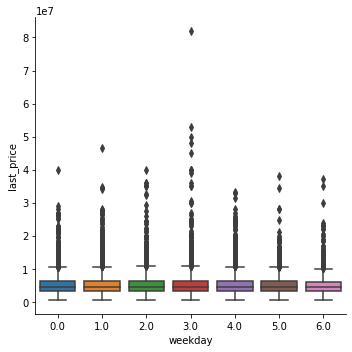

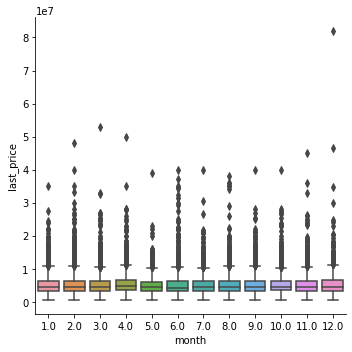

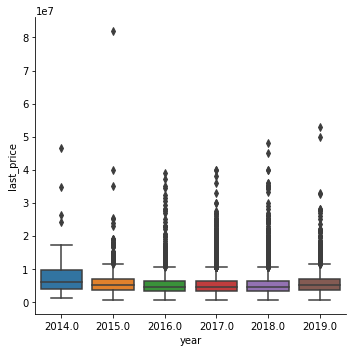

In [82]:
for column in ['rooms', 'floor_category', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=good_data)

#### Вывод
<br>
- Ожидаемо, наиболее сильная корреляция наблюдается между площадью квартиры и ее стоимостью (коэфф. корреляции 0,67).
Расстояние до центра города тоже влияет влияет на стоимость квартиры, но не так значимо, как можно было предположить (коэфф. корреляции -0,3).
<br>
- Стоимость квартиры также прямо коррелирует с количеством комнат до тех пор пока количество комнат не превышает 4, 5-комнатные квартиры могут быть проданы дешевле 4-комнатных.
<br>
- Квартиры на первом и последнем этажах продаются по цене ниже, чем квартиры на остальных этажах.
<br>
- День недели и месяц выставления квартиры на продажу не влияет значительно на стоимость продажи. Тут же заметим, что в 2014 году квартиры в среднем продавались по более высокой цене, что явно связано с экономической конъюнктурой в стране.

## 10 населенных пунктов с наибольшим числом объявлений



In [83]:
median_price_of_sqm = good_data.pivot_table(index='locality_name', values='price_of_sqm', aggfunc=['count', 'median'])
median_price_of_sqm.columns = ['count', 'median']
median_price_of_sqm.sort_values(by='count', ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,14490,103921.60
посёлок Мурино,518,85878.45
посёлок Шушары,436,76748.00
Всеволожск,395,65789.50
Пушкин,347,99650.30
Колпино,336,74723.75
посёлок Парголово,326,91780.25
Гатчина,303,67924.50
деревня Кудрово,298,91831.90


**Вывод:**
<br>
- Из топ-10 населенных пунктов по количеству объявлений лидерами по цене квадратного метра являются: Санкт-Петербург, Пушкин и деревня Кудрово.

- Дешевле всего квадратные метры в Выборге, Всеволожске и Гатчине.

## Выделение центра Санкт-Петербурга


In [84]:
data['cityСenters_km'] = round(data['cityCenters_nearest'] / 1000, 0).astype('int', errors='ignore')

'''good_data = data[(data['too_large_total_area'] == False) & 
     (data['too_big_last_price'] == False) &
     (data['too_many_rooms'] == False) &
     (data['too_high_ceiling'] == False) &
     (data['too_long_exposition'] == False) &
     (data['too_short_exposition'] == False)].reset_index(drop=True)'''

good_data = data[(data['last_price'] > 12190) & 
     (data['too_large_total_area'] == False) &
     (data['too_high_ceiling'] == False)].reset_index(drop=True)

    
    

good_data.loc[(good_data['locality_name'] == 'Санкт-Петербург') & (good_data['cityСenters_km'].notna()), 'cityСenters_km'].apply(round)
spb_data = good_data.query('locality_name == "Санкт-Петербург"')
spb_by_km = spb_data.pivot_table(index='cityСenters_km', values=['price_of_sqm', 'last_price'], aggfunc='median').reset_index()
spb_by_km.head(10)

,cityСenters_km,last_price,price_of_sqm
0,0.0,11500000.0,139318.90
1,1.0,9250000.0,127100.90
2,2.0,8860000.0,123966.90
3,3.0,7600000.0,110013.95
4,4.0,8000000.0,119224.10
5,5.0,8100000.0,126794.85
6,6.0,7610000.0,123973.70
7,7.0,6800000.0,120786.50
8,8.0,6781696.0,120147.75
9,9.0,5200000.0,105348.65


<AxesSubplot:xlabel='cityСenters_km', ylabel='last_price'>

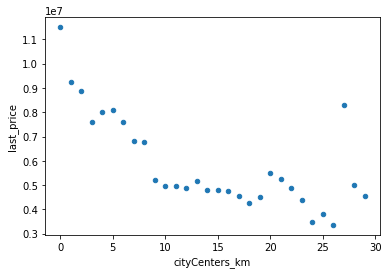

In [85]:
spb_by_km.plot(kind = 'scatter', x = 'cityСenters_km', y = 'last_price')

Видно резкое падение цены на графике, примем за центральный район окружность радиусом 8 км:

In [86]:
spb_center = good_data[(good_data['cityСenters_km'] <= 8) & (good_data['locality_name'] == 'Санкт-Петербург')]

In [87]:
spb_center['total_area'].describe()

count    3252.000000
mean       68.218216
std        22.531625
min        12.000000
25%        50.000000
50%        67.550000
75%        85.200000
max       114.200000
Name: total_area, dtype: float64

<AxesSubplot:>

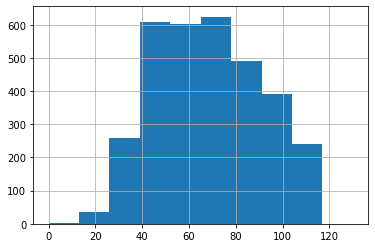

In [88]:
spb_center['total_area'].hist(range=(0, 130))

In [89]:
spb_center['last_price'].describe()

count    3.252000e+03
mean     9.012793e+06
std      5.235247e+06
min      1.600000e+06
25%      5.950000e+06
50%      7.800000e+06
75%      1.050000e+07
max      8.200000e+07
Name: last_price, dtype: float64

<AxesSubplot:>

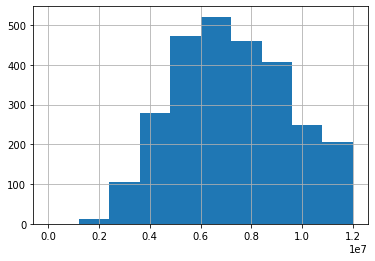

In [90]:
spb_center['last_price'].hist(range=(10000, 12000000))

In [91]:
spb_center['rooms'].describe()

count    3252.000000
mean        2.316728
std         0.953191
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: rooms, dtype: float64

<AxesSubplot:>

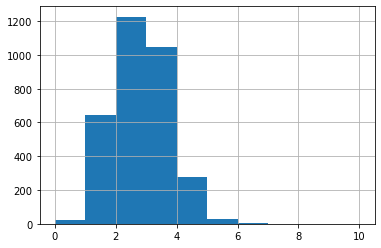

In [92]:
spb_center['rooms'].hist(range=(0, 10))

In [93]:
spb_center['ceiling_height'].describe()

count    3252.000000
mean        2.940292
std         0.299953
min         2.000000
25%         2.747503
50%         2.900000
75%         3.100000
max         5.800000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

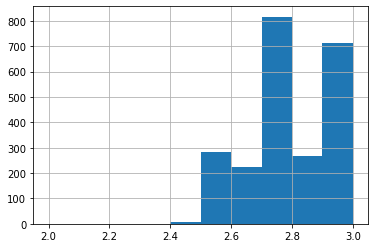

In [94]:
spb_center['ceiling_height'].hist(range=(2, 3))

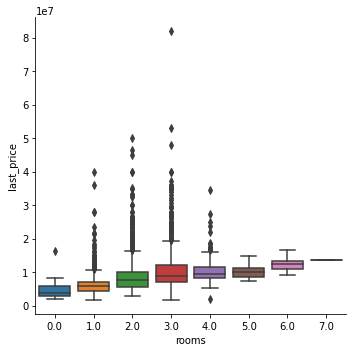

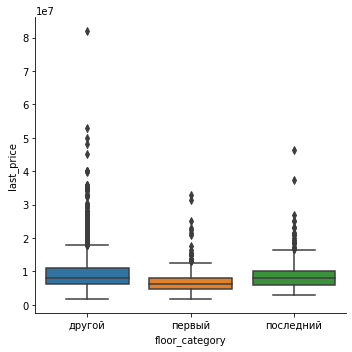

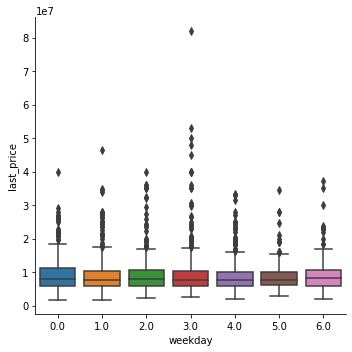

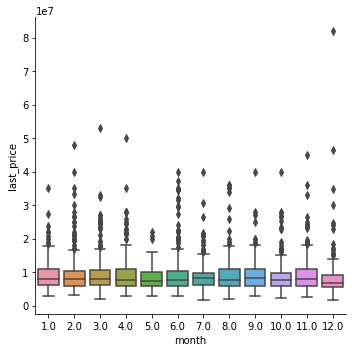

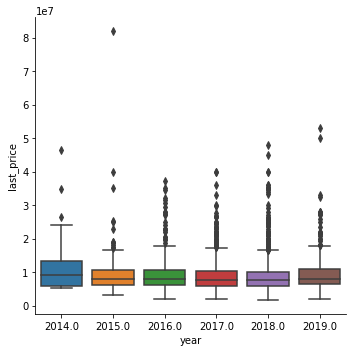

In [95]:
for column in ['rooms', 'floor_category', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=spb_center)

In [96]:
print(f"Корреляция цены и количества комнат: {round(data['last_price'].corr(data['rooms']), 2)}")
print(f"Корреляция цены и удаленности от центра: {round(spb_by_km['last_price'].corr(spb_by_km['cityСenters_km']), 2)}")

Корреляция цены и количества комнат: 0.36
Корреляция цены и удаленности от центра: -0.72


**Вывод**

Средняя продаваемая в центре Санкт-Петербурга квартира имеет такие параметры: 2-комнатная квартира площадью 58,3 кв. м с потолками 2,65 м с ценой в 6,8 млн рублей.

Факторы, влияющие на стоимость квартиры:

- Зависимость стоимости квартиры от числа комнат в центре Санкт-Петербурга проявляются сильнее чем в целом по выборке: наблюдается прямо пропорциональная зависимость цены от числа комнат. В отличие от результатов по всем квартирам, 5-комнатные квартиры в центре Санкт-Петербурга, продаются дороже, чем 4-комнатные.
- В центре города существует явная зависимость от этажа расположения квартиры: квартира на последнем этаже будет стоить дороже, чем на первом. Подобное не наблюдается в окрестностях.
- Расстояние от центра так же прямо влияет на стоимость.
- Квартиры, объявления о продаже которых публикуются в воскресенье, в среднем продаются по более высокой цене. Дороже продаются квартиры, опубликованные в начале марте, июле и сентябре.


## Общий вывод


В исходных данных содержатся 23699 строк, 14 из 22 столбцов имеют пропущенные значения. При этом сразу видны аномальные значения в виде высоты потолка в 1 и 100 м, жилая площадь в 2 м и цена в 12 190 руб.
Были обработаны пропущенные значения в столбцах:
- «Высота потолков» - 38.8% пропусков, заменены на медиану по этажности здания, где это возможно, и на общую медиану в остальных случаях
- «Жилая площадь в квадратных метрах» - 7.9% пропусков, заменены на медиану по количеству комнат
- «Площадь кухни в квадратных метрах» - 9.4% пропусков, заменены на долю от общей площади
- Удалены столбцы с пропусками «Всего этажей в доме» (0.4% пропусков), «Название населённого пункта» (0.2% пропусков)
- Для некоторых квартир не указано расстояние до всех объектов, которые могут повлиять на цену. Явная проблема в сборе геоданных

Изменен тип данных столбца "first_day_exposition" на datetime.
Посчитаны и добавлены в таблицу:
- «Цена квадратного метра»
- «День недели, месяц и год публикации объявления»
- «Этаж квартиры; варианты — первый, последний, другой»
- «Соотношение жилой и общей площади, а также отношение площади кухни к общей»
Проведен исследовательский анализ данных и получены следующие выводы:
Средняя квартира, выставленная на продажу, имеет следующие характеристики: это 2-комнатная квартира площадью 52 кв. м с потолками 2,65 м, проданная за 3 месяца (95 дней) по цене 4,7 млн рублей.
В данных есть явные ошибки в виде метража от 114 до 900 м (5.26% от общего набора данных, сложно исправить), высота потолков от 8 до 32 м и даже 100 м (ошибочные данные частично вычищены, аномалий осталось 7.18%).

Выделяющиеся характеристики квартир из представленного набора данных:

- 7 комнатная квартира или больше
- площадью более 114,3 кв. м
- с потолками менее 2,25 м или более 3,05 м
- по цене более 11,9 млн рублей
- проданная за 14 месяцев (428 дней) или более

Различные факторы коррелируют со стоимостью недвижимости так:
- Наиболее сильная корреляция наблюдается между площадью квартиры и ее стоимостью (коэфф. корреляции 0,67). Расстояние до центра города тоже влияет влияет на стоимость квартиры, но не так значимо, как можно было предположить (коэфф. корреляции -0,3).
- Стоимость квартиры также прямо коррелирует с количеством комнат до тех пор пока количество комнат не превышает 4, 5-комнатные квартиры могут быть проданы дешевле 4-комнатных.
- Квартиры на первом и последнем этажах продаются по цене ниже, чем квартиры на остальных этажах.
- День недели и месяц выставления квартиры на продажу не влияет значительно на стоимость продажи. Тут же заметим, что в 2014 году квартиры в среднем продавались по более высокой цене, что явно связано с экономической конъюнктурой в стране.

Из топ-10 населенных пунктов по количеству объявлений лидерами по цене квадратного метра являются: Санкт-Петербург, Пушкин и деревня Кудрово. Дешевле всего квадратные метры в Выборге, Всеволожске и Гатчине.
<br>
Выделяя центр Санкт-Петербурга, наблюдаем следующую картину:
Средняя продаваемая в центре Санкт-Петербурга квартира имеет такие параметры: 2-комнатная квартира площадью 58,3 кв. м с потолками 2,65 м с ценой в 6,8 млн рублей.
<br>
Факторы, влияющие на стоимость квартиры в центре Санкт-Петербурга (окружность с радиусом в 8 км):
- Зависимость стоимости квартиры от числа комнат в центре Санкт-Петербурга проявляются сильнее чем в целом по выборке: наблюдается прямо пропорциональная зависимость цены от числа комнат. В отличие от результатов по всем квартирам, 5-комнатные квартиры в центре Санкт-Петербурга, продаются дороже, чем 4-комнатные.
- В центре города существует явная зависимость от этажа расположения квартиры: квартира на последнем этаже будет стоить дороже, чем на первом. Подобное не наблюдается в окрестностях.
- Расстояние от центра так же прямо влияет на стоимость, коэффициент корреляции 0.72
- Квартиры, объявления о продаже которых публикуются в воскресенье, в среднем продаются по более высокой цене. Дороже продаются квартиры, опубликованные в начале марте, июле и сентябре.

